<img src="https://docs.actable.ai/_images/logo.png" style="object-fit: cover; max-width:100%; height:300px;" />

# AAIClassificationTask

This notebook is an example on how you can run a classification automatically with
[Actable AI](https://actable.ai)

For this example we will classify customer churn and we will try to predict
which customer is going to leave in the next month.

For this example the dataset we are going to use is the [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

### Imports

This part simply imports the python modules.
Last line imports the ClassificationTask from actableai

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

from actableai import AAIClassificationTask

### Importing the data

This part imports the data and cut it into two parts.\
First part will be the data we use for training and second part
will be used to showcase the predictive power of the new generated model

In [2]:
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv").head(100)
train_ratio = 0.8
df_train = df.iloc[:int(train_ratio * len(df))]
df_prediction = df.iloc[int(train_ratio * len(df)):]
print(f"Number of features : {df.shape[1]}, Number of rows : {df.shape[0]}")
df[["customerID", "gender", "TotalCharges", "Churn"]].head(5)

Number of features : 21, Number of rows : 100


,customerID,gender,TotalCharges,Churn
0,7590-VHVEG,Female,29.85,No
1,5575-GNVDE,Male,1889.5,No
2,3668-QPYBK,Male,108.15,Yes
3,7795-CFOCW,Male,1840.75,No
4,9237-HQITU,Female,151.65,Yes


### Calling Actable AI task

This part is the call to the ActableAI classification analysis.\
To learn more about the available parameters you can consult the [API Documentation](https://lib.actable.ai/actableai.tasks.html#module-actableai.tasks.classification)

In [ ]:
# Here df is the DataFrame containing our data
# target is "Churn" because we want to predict the churn
# features set to None means that we will use every single feature available
result = AAIClassificationTask().run(
    df=df_train,
    target="Churn",
    features=None
)

### Evaluation of the generated model

In this part we take a look at the metrics created by the model on the validation set.\
The validation set is created internally so you dont need to specify it.

              metric     value
0           accuracy  0.750000
1  balanced_accuracy  0.666667
2                mcc  0.333333
3            roc_auc  0.833333
4                 f1  0.500000
5          precision  0.500000
6             recall  0.500000


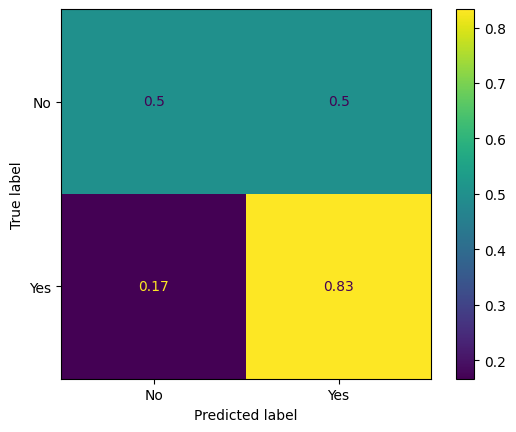

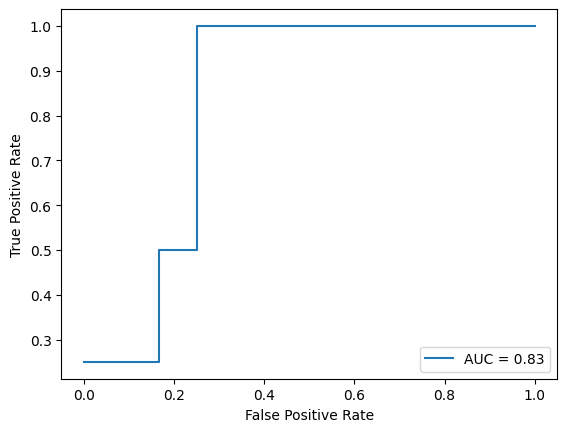

In [4]:
evaluation = result["data"]["evaluate"]
metrics = evaluation["metrics"]
print(metrics)
labels = evaluation["labels"]
confusion_matrix = result["data"]["evaluate"]["confusion_matrix"]
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=labels)
disp.plot()
plt.show()
auc_curve = result["data"]["evaluate"]["auc_curve"]
fpr, tpr, roc_auc = auc_curve["False Positive Rate"], auc_curve["True Positive Rate"], metrics[metrics["metric"] == "roc_auc"]["value"].iloc[0]
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
disp.plot()
plt.show()

### Prediction with the generated model

Finally, we showcase how we can use the generated model to make further predictions\
on unseen data. Here in our case we already have the values but this works for any\
new incoming data points.

In [5]:
model = result["model"]
prediction = model.predict(df_prediction)
df_prediction["Predicted Churn"] = prediction
df_prediction[["customerID", "gender", "TotalCharges", "Churn", "Predicted Churn"]].head(5)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,customerID,gender,TotalCharges,Churn,Predicted Churn
80,5919-TMRGD,Female,79.35,Yes,No
81,8108-UXRQN,Female,565.35,No,No
82,9191-MYQKX,Female,496.9,Yes,Yes
83,9919-YLNNG,Female,4327.5,No,Yes
84,0318-ZOPWS,Female,973.35,No,No
